# Part I - (Data Exploratory of Prosper loans applied after July 2009)
## by (Akorede Ridwanullahi Abiodun )

## Introduction

In this investigation, I wanted to look at the details of the people that applied for Prospers loans from July 2009.


## Preliminary Wrangling
The original data contain 113937 loans which entail 81 variables on each loan. The data was filtered down to contain only loans applied after July 2009 and some unused variables were dropped while the variables were reduced to 19.

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [18]:
# load in the dataset into a pandas dataframe, print statistics
prosper_loan = pd.read_csv('prosperLoanData.csv')

In [19]:
prosper_loan.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [20]:
prosper_loan.head(7)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [21]:
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [22]:
prosper_loan.shape

(113937, 81)

In [23]:
prosper_loan.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

In [24]:
#removing of unused variables
prosper_loan=prosper_loan.drop(columns=[
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio',  'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanKey', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
       'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
       'MonthlyLoanPayment', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
       'Investors'])

In [25]:
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   ListingNumber              113937 non-null  int64  
 2   ListingCreationDate        113937 non-null  object 
 3   CreditGrade                28953 non-null   object 
 4   Term                       113937 non-null  int64  
 5   LoanStatus                 113937 non-null  object 
 6   ClosedDate                 55089 non-null   object 
 7   BorrowerAPR                113912 non-null  float64
 8   BorrowerRate               113937 non-null  float64
 9   ProsperRating (numeric)    84853 non-null   float64
 10  ProsperRating (Alpha)      84853 non-null   object 
 11  ProsperScore               84853 non-null   float64
 12  ListingCategory (numeric)  113937 non-null  int64  
 13  BorrowerState              10

In [26]:
#renaming of variables
def column_rename(dataframe,old_name,new_name):
    """renaming of variable using rename function"""
    return dataframe.rename(columns = {old_name : new_name},inplace=True)

column_rename(prosper_loan,'ProsperRating (numeric)', 'ProsperRatingNumeric')
column_rename(prosper_loan,'ProsperRating (Alpha)', 'ProsperRatingAlpha')
column_rename(prosper_loan,'ListingCategory (numeric)', 'ListingCategoryNumeric')

In [27]:
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingKey                113937 non-null  object 
 1   ListingNumber             113937 non-null  int64  
 2   ListingCreationDate       113937 non-null  object 
 3   CreditGrade               28953 non-null   object 
 4   Term                      113937 non-null  int64  
 5   LoanStatus                113937 non-null  object 
 6   ClosedDate                55089 non-null   object 
 7   BorrowerAPR               113912 non-null  float64
 8   BorrowerRate              113937 non-null  float64
 9   ProsperRatingNumeric      84853 non-null   float64
 10  ProsperRatingAlpha        84853 non-null   object 
 11  ProsperScore              84853 non-null   float64
 12  ListingCategoryNumeric    113937 non-null  int64  
 13  BorrowerState             108422 non-null  o

In [28]:
#filtering out loans before July 2009 and non values in loans beyond 2009
prosper_loan_2009_above=prosper_loan[prosper_loan.ProsperRatingNumeric.notna()]
prosper_loan_2009_below=prosper_loan[prosper_loan.CreditGrade.notna()]

In [29]:
print(prosper_loan_2009_above.ProsperRatingAlpha.unique())
print(prosper_loan_2009_above.ProsperScore.unique())
print(prosper_loan_2009_above.ProsperRatingNumeric.unique())

['A' 'D' 'B' 'E' 'C' 'AA' 'HR']
[ 7.  9.  4. 10.  2. 11.  8.  5.  3.  6.  1.]
[6. 3. 5. 2. 4. 7. 1.]


In [30]:
#cleaning was carried out by changing Not employed value to $0
prosper_loan_2009_above = prosper_loan_2009_above.replace({'IncomeRange': {'Not employed' : '$0' }})

In [31]:

#transformation of Term values
prosper_loan_2009_above = prosper_loan_2009_above.replace({'Term': {12 : '12-Short Term', 36:'36-Mid Term', 60: '60-Long Term'}})

#convert ProsperRatingNumeric, ProsperScore, ProsperRatingAlpha and term to categorical types
ordinal_value = {'ProsperRatingNumeric': [1.0,2.0,3.0,4.0,5.0,6.0,7.0], 
                  'ProsperScore' :[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0],
                 'ProsperRatingAlpha' : ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], 
                 'Term' : ['12-Short Term', '36-Mid Term', '60-Long Term'],
                'IncomeRange' : ['$0','$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999','$100,000+']}
for var in ordinal_value:
    ordered_value = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_value[var])
    prosper_loan_2009_above[var] = prosper_loan_2009_above[var].astype(ordered_value)

In [32]:
prosper_loan_2009_above.describe()

,ListingNumber,BorrowerAPR,BorrowerRate,ListingCategoryNumeric,EmploymentStatusDuration
count,8.485300e+04,84853.000000,84853.000000,84853.000000,84834.000000
mean,7.738749e+05,0.226658,0.196022,3.312647,103.055320
std,2.363387e+05,0.079916,0.074631,4.364277,97.078884
min,4.162750e+05,0.045830,0.040000,0.000000,0.000000
25%,5.580860e+05,0.163280,0.135900,1.000000,30.000000
50%,7.392460e+05,0.219450,0.187500,1.000000,74.000000
75%,9.794360e+05,0.292540,0.257400,3.000000,148.000000
max,1.255725e+06,0.423950,0.360000,20.000000,755.000000


In [33]:
prosper_loan_2009_above.shape

(84853, 19)

In [34]:
prosper_loan_2009_above.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRatingNumeric', 'ProsperRatingAlpha', 'ProsperScore',
       'ListingCategoryNumeric', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'IncomeRange'],
      dtype='object')

### What is the structure of your dataset?

> The original data contain 113937 loans which entail 81 variables on each loan. The data was filtered down to contain only loans applied after July 2009 and some unused variables were dropped while the variables were reduced to 19. Whilst Term, ProsperRatingNumeric, ProsperRatingAlpha, ProperScore are categorical types

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the borrowers of the prosper loans from July 2009 in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that variables remain will enable me to have more details on the borrowers

## Univariate Exploration

### Checking the distribution of Borrower APR, Borrower rate and Employment Status duration

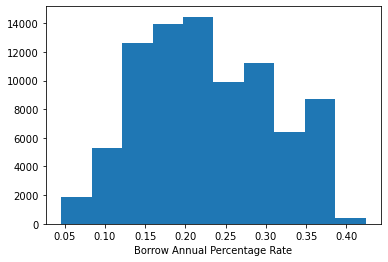

In [35]:
#standard bin size
plt.hist(data = prosper_loan_2009_above, x = 'BorrowerAPR');
plt.xlabel('Borrow Annual Percentage Rate')
plt.show()

#### Observation
In the above plot, it was observed that the distribution is a unimodal with the peak distribution between 0.20 and 0.25, there is need to reduce the bin size so that to have much in depth of the plot

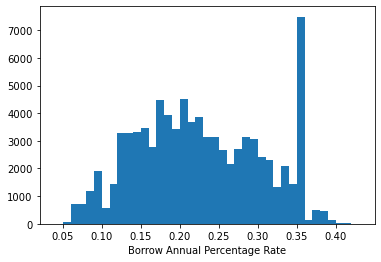

In [36]:
#reduction of bin size
bin_size =np.arange(0.04, prosper_loan_2009_above.BorrowerAPR.max()+0.01,0.01)
plt.hist(data = prosper_loan_2009_above, x = 'BorrowerAPR',bins = bin_size);
plt.xlabel('Borrow Annual Percentage Rate')
plt.show()

#### Observation
When the bin size is decreased to 0.01, the results of the bin show that the plot is multimodal with a very wide range of values from 0.10 to 0.36 and a peak rise of the distribution at 0.36 that is significant when compared to other values.

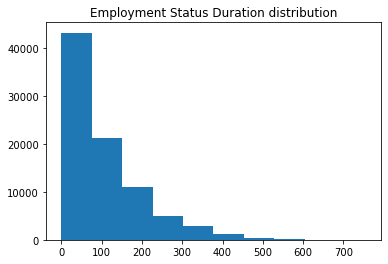

In [37]:
#default bin size
plt.hist(data=prosper_loan_2009_above, x = 'EmploymentStatusDuration');
plt.title('Employment Status Duration distribution');

#### Observation
The plot is rightly skewed and unimodal as shown in the plot above but to explore further the bin size will be reduced if there will be any changes in the plot distribution

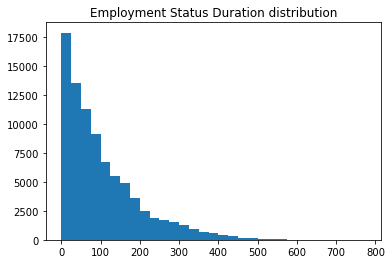

In [38]:
#reduction of bin size
bin_size= np.arange(0,prosper_loan_2009_above.EmploymentStatusDuration.max()+25,25)
plt.hist(data=prosper_loan_2009_above, x = 'EmploymentStatusDuration', bins=bin_size);
plt.title('Employment Status Duration distribution');

#### Observation
After the bin range has been reduced,the plot still maintained it skewness and unimodal and it has proved further that the highest distribution is between 0 and 25

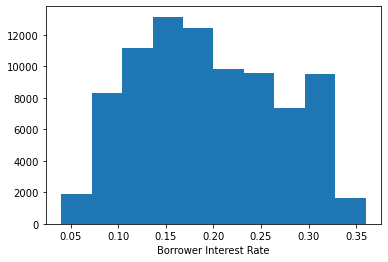

In [39]:
#Standard bin size
plt.hist(data = prosper_loan_2009_above, x = 'BorrowerRate');
plt.xlabel('Borrower Interest Rate')
plt.show()

#### Observation
In the above plot, it was observed that the distribution is a unimodal with the peak distribution at 0.15, there is need to reduce the bin size so that to have much in depth of the plot

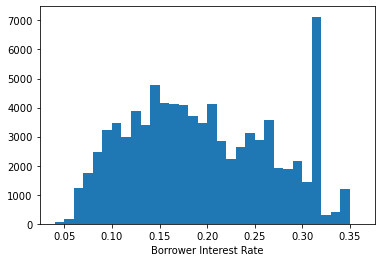

In [40]:
#reduction of bin size
bin_size= np.arange(0.04, prosper_loan_2009_above.BorrowerRate.max()+0.01,0.01)
plt.hist(data = prosper_loan_2009_above, x = 'BorrowerRate', bins=bin_size);
plt.xlabel('Borrower Interest Rate')
plt.show()

#### Observation
When the bin size is decreased to 0.01, the results of the bin show that the plot is multimodal with a very wide range of values from 0.05 to 0.32 and a peak rise of the distribution at 0.32 that is significant when compared to other values.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Whilst maintaining the actual bin size of distribution, it showed that most loans have Borrowerrate of 0.15 and Borrrower Annual Percent Rate was 0.20 plus. After further investigation by reducing the bin size, it shows that the Borrower interest rate of the highest number of loans was 0.32 while Borrower Annual Percentage Rate was 0.36 plus which contradicted the first distribution that maintained the default bin size


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data solemnly focus on the data from loan originated from July 2009, so some of the non values on some variables has been dropped and likewise loans originated before July 2009

In [41]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

### What is the prosper rating of people applying for loan?

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


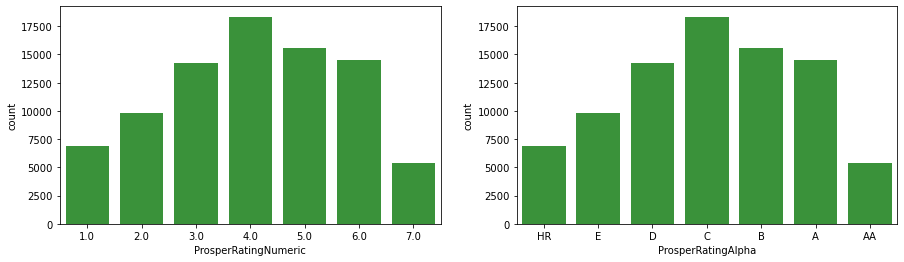

In [42]:
#plotting ProsperRatingNumeric and ProsperRatingAlpha to ascertain if both maintain the same frequency 
base_color = sb.color_palette()[2]
fig, ax =  plt.subplots(ncols=2,figsize = [15,4])
sb.countplot(data = prosper_loan_2009_above, x='ProsperRatingNumeric', color = base_color, ax = ax[0]);
sb.countplot(data = prosper_loan_2009_above, x='ProsperRatingAlpha', color = base_color,ax = ax[1]);

#### Observation
Most of the prosperRating of the loans fell on C/4.0 follow by B/5.0 while AA/7.0 has the least rating being the best rating. It has shown that most rating fell on Average which is C/4.0

#### What is the prosper risk score of loans applied

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


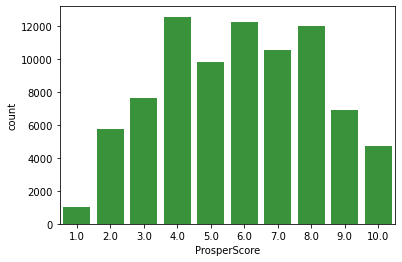

In [43]:
#plotting of ProperScore to highlight the score 
sb.countplot(data = prosper_loan_2009_above, x='ProsperScore', color = base_color);

#### Observation
With the above visualization it has been proven that the risk score of Prosper borrower listings is minimal and intermediary while the highest risk (1) has the lowest frequency compare to others and the best / lowest risk follow the highest risk in frequency range

### What is the loan status of all the loans after July 2009

In [44]:
#combining all past due values in LoanStatus to a single value
prosper_loan_2009_above= prosper_loan_2009_above.replace({'LoanStatus' : {'Past Due (1-15 days)' : 'Past Due', 'Past Due (16-30 days)': 'Past Due', 'Past Due (31-60 days)': 'Past Due', 
                                                          'Past Due (61-90 days)': 'Past Due', 'Past Due (91-120 days)': 'Past Due',
                                                          'Past Due (>120 days)': 'Past Due'}})
prosper_loan_2009_above.LoanStatus.unique()

array(['Current', 'Past Due', 'Defaulted', 'Completed', 'Chargedoff',
       'FinalPaymentInProgress'], dtype=object)

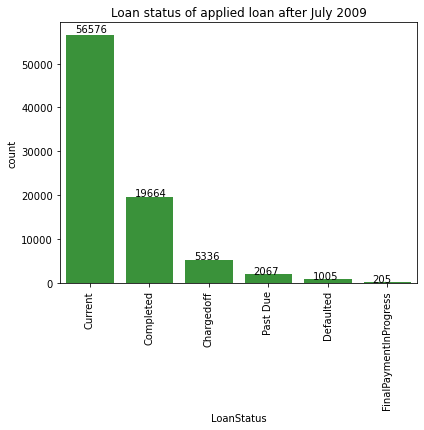

In [64]:
#plotting loan status
loan_status= prosper_loan_2009_above['LoanStatus'].value_counts().index
ax =sb.countplot(data = prosper_loan_2009_above, x='LoanStatus', color = base_color, order=loan_status);
plt.xticks(rotation = 90)
plt.title('Loan status of applied loan after July 2009');
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.15,p.get_height()*1.01))

#### Observation
With loan status that fell under several past due were truncated in order to reduced number of bars and also have a neat plot. However, the above plot has proved that most of the loans are still ongoing, with less than 6,000 loans that has been charged off and the FInalPaymentinProgress is 205

#### Which State has the highest and lowest number of loan applications?

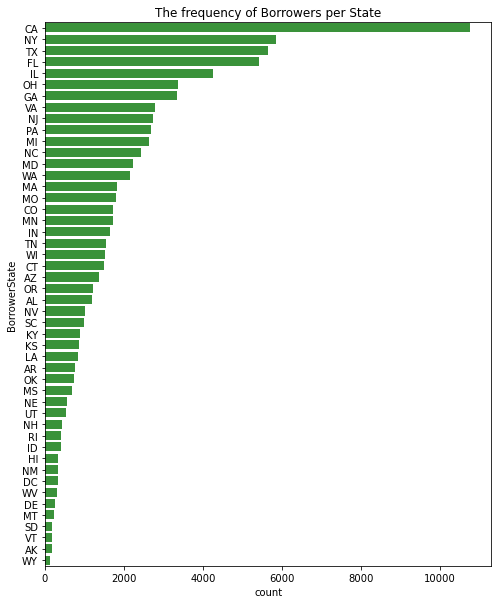

In [65]:
plt.rcParams["figure.figsize"] = (8,10)
state_count = prosper_loan_2009_above['BorrowerState'].value_counts().index
sb.countplot(data = prosper_loan_2009_above, y='BorrowerState', color = base_color, order=state_count);
plt.title('The frequency of Borrowers per State');

#### Observation
Most of the prospers loan borrowers were from California (CA) and the less borrowers from Wyoming (WY)

#### What is the most and least listing category loans applied after July 2009 falls into?

In [47]:
prosper_loan_2009_above = prosper_loan_2009_above.replace({'ListingCategoryNumeric': { 0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 
                                                                                      4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat',
                                                                                      10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 
                                                                                      14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 
                                                                                      19 : 'Vacation', 20 : 'Wedding Loans'}})

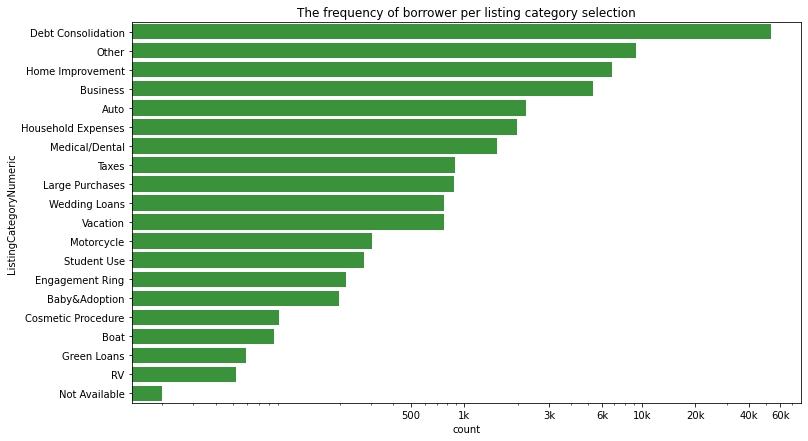

In [66]:
#plot for tge number of borrower per listingcategorynumeric
plt.rcParams["figure.figsize"] = (12,7)
order_category = prosper_loan_2009_above.ListingCategoryNumeric.value_counts().index
sb.countplot(data=prosper_loan_2009_above, y='ListingCategoryNumeric', color = base_color,order=order_category);
plt.title('The frequency of borrower per listing category selection');
plt.xscale('log')
plt.xticks([500, 1e3, 3e3,6e3,10e3,20e3,40e3,60e3],['500','1k','3k','6k','10k','20k','40k','60k']);

#### Observation
In order to have a well understandable plot, all the Listing Category numbers were changed to their actual name and plot has prove the highest number people applying for loan from July 2009 up ward in the dataset applied for the loan to consolidate debt.

In [67]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

### What is the employment status of the borrowers

In [50]:
prosper_loan_2009_above['EmploymentStatusMerge'] = prosper_loan_2009_above.EmploymentStatus
prosper_loan_2009_above= prosper_loan_2009_above.replace({'EmploymentStatusMerge': {'Retired' : 'Not employed', 
                                                                                    'Full-time' : 'Employed', 'Part-time' : 'Employed'}})

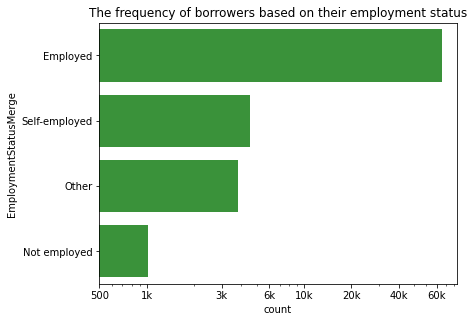

In [72]:
employment_status= prosper_loan_2009_above['EmploymentStatusMerge'].value_counts().index
sb.countplot(data = prosper_loan_2009_above, y='EmploymentStatusMerge', color = base_color, order=employment_status);
plt.title('The frequency of borrowers based on their employment status');
plt.xscale('log')
plt.xticks([500, 1e3, 3e3,6e3,10e3,20e3,40e3,70e3],['500','1k','3k','6k','10k','20k','40k','70k']);

#### Observation
The Employment status was cleaned by creating another variable named Employment Status Merge.The new columns was centered on the change of values such as Retired to Not employed and both Full time and Part time to Employed. With this replacement,it proved that most of the Borrower are employee of an establishment

### Which term was mostly chose while applying for the loan?

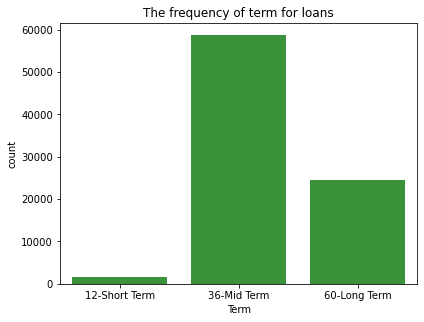

In [52]:
#plotting to know the number terms 
sb.countplot(data=prosper_loan_2009_above, x='Term', color=base_color);
plt.title('The frequency of term for loans');

#### Observation
Most of the loan applied, the most term of the loans are of Mid term with a 36 months of payment 

#### What is the income range of people applying for loan

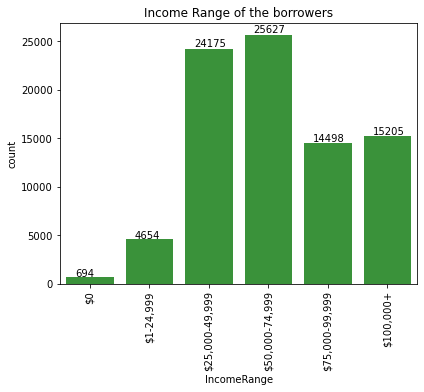

In [53]:
#income range of borrowers
ax = sb.countplot(data=prosper_loan_2009_above, x = 'IncomeRange',color = base_color);
plt.xticks(rotation= 90);
plt.title('Income Range of the borrowers');
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.15,p.get_height()*1.01))

#### Observation
Income range of people applying for loan falls between $25,000 - 49,9999 and $50,000 - 74,999 though the later income range has the highest number of borrower

#### Does the borrower house owner?

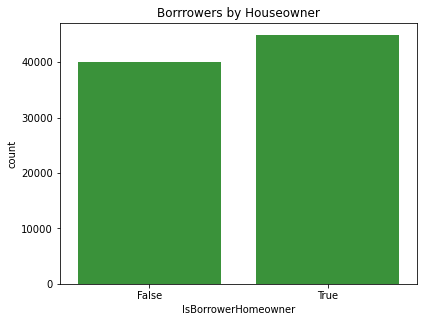

In [54]:
sb.countplot(data=prosper_loan_2009_above, x='IsBorrowerHomeowner', color = base_color);
plt.title('Borrrowers by Houseowner');

#### Observation
It has shown above that highest number of borrwers are house owners

## Bivariate Exploration

### Checking correlation of some variables

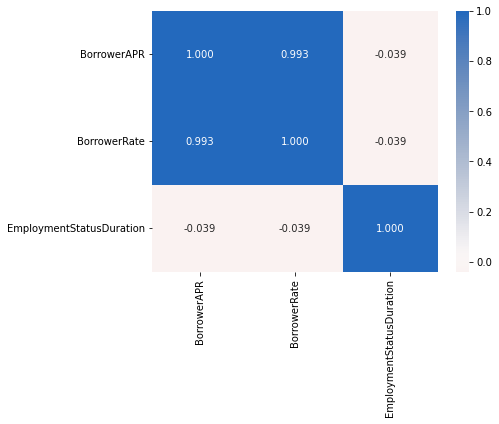

In [68]:
numerical_var = ['BorrowerAPR', 'BorrowerRate', 'EmploymentStatusDuration']
sb.heatmap(prosper_loan_2009_above[numerical_var].corr(), annot= True, fmt = '.3f', cmap = 'vlag_r', center = 0);

#### Observation
It has shown that there is a high positive correlation between BorrowerAPR and BorrowerRate while neither of the two correlate with Employment status duration

### Income range by Employment Status

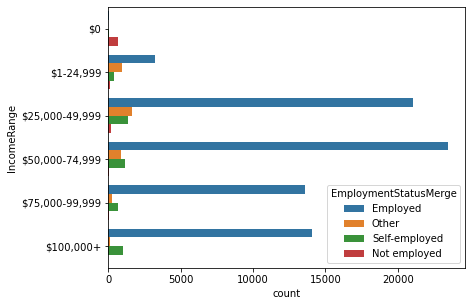

In [56]:
sb.countplot(data=prosper_loan_2009_above, y= 'IncomeRange', hue='EmploymentStatusMerge');

#### Observation
The above plot butressed more on the earlier plots on income range and employment status of the borrowers which details that most people applying for loan are employed and their income range is \\$50,000 - 74,9999. More so at people with income range of \\$0 are not employed. The People with highest income range of \\$100,000+ are employed, self employed and other

#### California State Borrower by Employment Status and income range

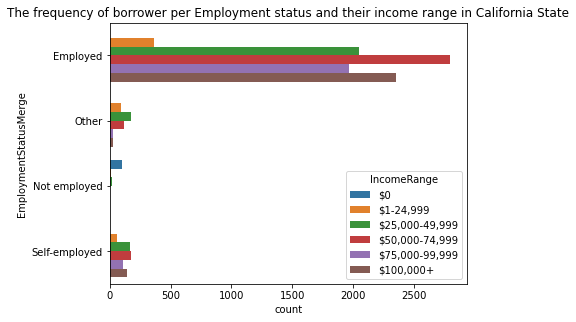

In [57]:
CA_borrower_employee =prosper_loan_2009_above[prosper_loan_2009_above['BorrowerState'] == "CA"]
sb.countplot(data=CA_borrower_employee, y='EmploymentStatusMerge',hue='IncomeRange');
plt.title('The frequency of borrower per Employment status and their income range in California State');

#### Observation
It has showned that most people applied for loan in California are employment with the income range of \\$50,000 - 74,999

#### Loan term by Income range

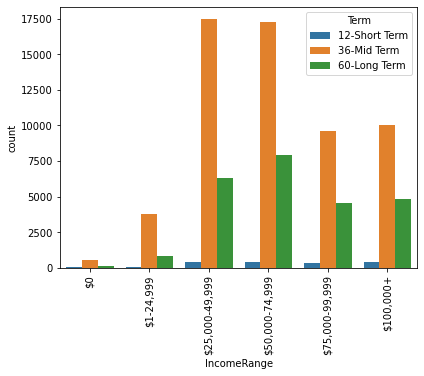

In [58]:
sb.countplot(data=prosper_loan_2009_above, x = 'IncomeRange', hue = 'Term')
plt.xticks(rotation = 90);

#### Observation
The plot has proved that 36 mid term ofloan has the highest in all income range level

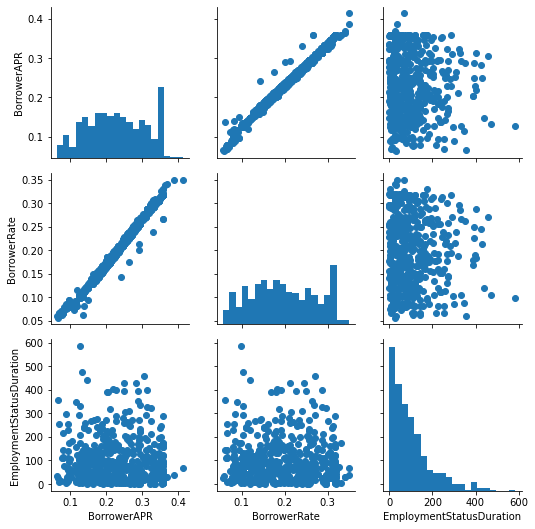

In [69]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
samples = np.random.choice(prosper_loan_2009_above.shape[0], 500, replace = False)
prosper_loan_2009_above_samp = prosper_loan_2009_above.iloc[samples,:]

g = sb.PairGrid(data = prosper_loan_2009_above_samp, vars = numerical_var);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

#### Observation
The above plot butressed more the on the earlier heatmap plotted for the correlation of borrowerAPR, borrowerrate and EmploymentStatusduration. It shows that borrrowerAPR and borrowerrate maintained a linear relationship but neither of the two has relationship wih employment status duration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Both borrowerAPR and borrowerrate variables are correlated

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Non

## Multivariate Exploration

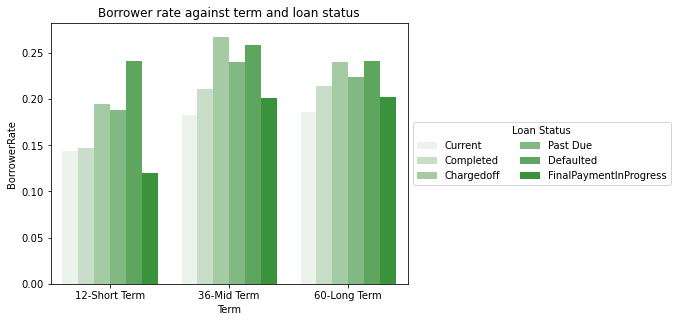

In [60]:
order_loan = prosper_loan_2009_above.LoanStatus.value_counts().index
sb.barplot(data=prosper_loan_2009_above, y = 'BorrowerRate', x='Term', hue='LoanStatus',hue_order = order_loan, color = base_color,errwidth=0);
plt.legend(title = 'Loan Status',ncol =2, loc = 6, bbox_to_anchor = (1,0.5));
plt.title('Borrower rate against term and loan status');

#### Observation
The plot has proved that the highest borrower rate falls in the mid term. While 12-short term final payment in progress maintained the lowest

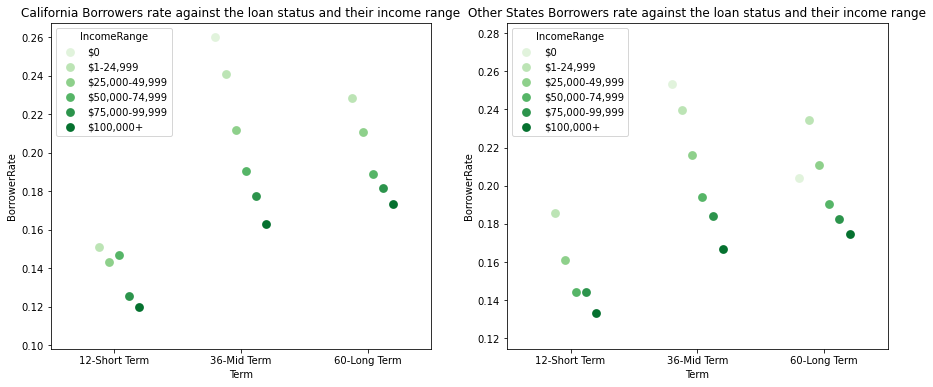

In [70]:
#relationship of borrower rate, term and income range of the employed people in california to other states 
CA_borrower_employee = CA_borrower_employee[CA_borrower_employee.EmploymentStatusMerge == 'Employed']
non_CA_state_borrower_employee = (prosper_loan_2009_above.BorrowerState != 'CA') & (prosper_loan_2009_above.EmploymentStatusMerge == 'Employed')
non_CA_state_borrower_employee = prosper_loan_2009_above.loc[non_CA_state_borrower_employee,:]

fig, ax = plt.subplots(ncols = 2, figsize = [15,6])

sb.pointplot(data = CA_borrower_employee, x = 'Term', y = 'BorrowerRate', hue = 'IncomeRange',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0], errwidth=0)
ax[0].set_title('California Borrowers rate against the loan status and their income range')


sb.pointplot(data = non_CA_state_borrower_employee, x = 'Term', y = 'BorrowerRate', hue = 'IncomeRange',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1], errwidth=0)
ax[1].set_title('Other States Borrowers rate against the loan status and their income range')
ax[1].set_ylabel('BorrowerRate')
plt.show();

#### Observation
The \\$0 income range has the highest borrower rate while the least borrower rate of income range is \\$100,000+ which is applicable to all terms for all states

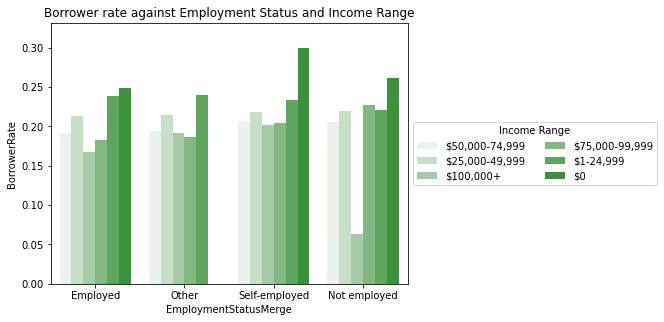

In [71]:
order_loan = prosper_loan_2009_above.IncomeRange.value_counts().index
sb.barplot(data=prosper_loan_2009_above, y = 'BorrowerRate', x='EmploymentStatusMerge', hue='IncomeRange',hue_order = order_loan, color = base_color,errwidth=0)
plt.legend(title = 'Income Range',ncol =2, loc = 6, bbox_to_anchor = (1,0.5));
plt.title('Borrower rate against Employment Status and Income Range');

#### Observation
Employment statuses with \\$0 has the highest borrower rate 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 36 or mid term has the highest borrower rate and past due loan statuses are high compare others. Moreso in the Borrower rate against Employment Status and Income range,it shows that the borrowers not employed earning $100,000+ have a lesser borrower rate 

### Were there any interesting or surprising interactions between features?

> It has shown on each term the $0 income range has the highest borrower rate compare to others on all the states comparing both plots. 

## Conclusions
> In the course of the project, it shows that the highest borrower annual percentage rate and borrower interest rate for loans after July 2009 is 0.36 and between 0.32 respectively
The most prosper rating of all loans is 4.0 equivalent to C while the minimum rate is 7.0 equivalent to AA. The highest and lowest prosper score of the loans is 4.0 and 1.0 respectively
> It has proven that the highest number of the status loans are current and the state with the highest borrowers is CA while the lowest is WY.

> Most loans listing categories are for debt consolidation and Employed people maintained the highest number of people applied for the loan based on their employment status with their earnings within $50,000 to 74,999 and the terms of the loan are midterm which equivalent to 36 

> The Borrower state of CA was worked to have some details of the borrowers. The outcome shows that the highest number of employed people in CA applied for the loan with an income range of $50000 - 74999
